In [15]:

# Cell 1: Import libraries
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

# Set style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11


In [16]:
# Cell 2: Load conversion results
def load_language_conversion_results(results_file):
    """Load the language conversion results JSON file."""
    with open(results_file, 'r') as f:
        return json.load(f)

# Load data - UPDATE THIS PATH
results_file = "/data/jane/math_gender/conversion_test/language_conversion_results/language_conversion_results_20251217_124233.json"
data = load_language_conversion_results(results_file)
df = pd.DataFrame(data)

print(f"Loaded {len(df)} conversion results")
print(f"Models: {df['model'].unique().tolist()}")
print(f"Languages: {df['language'].unique().tolist()}")
print(f"Conversion types: {df['conversion_type'].unique().tolist()}")
print(f"Total ingredients: {df['ingredient'].nunique()}")


Loaded 804 conversion results
Models: ['gpt-4o', 'qwen-coder', 'llama-4', 'deepseek-r1']
Languages: ['english', 'japanese', 'context_free']
Conversion types: ['us_to_metric', 'metric_to_us']
Total ingredients: 129


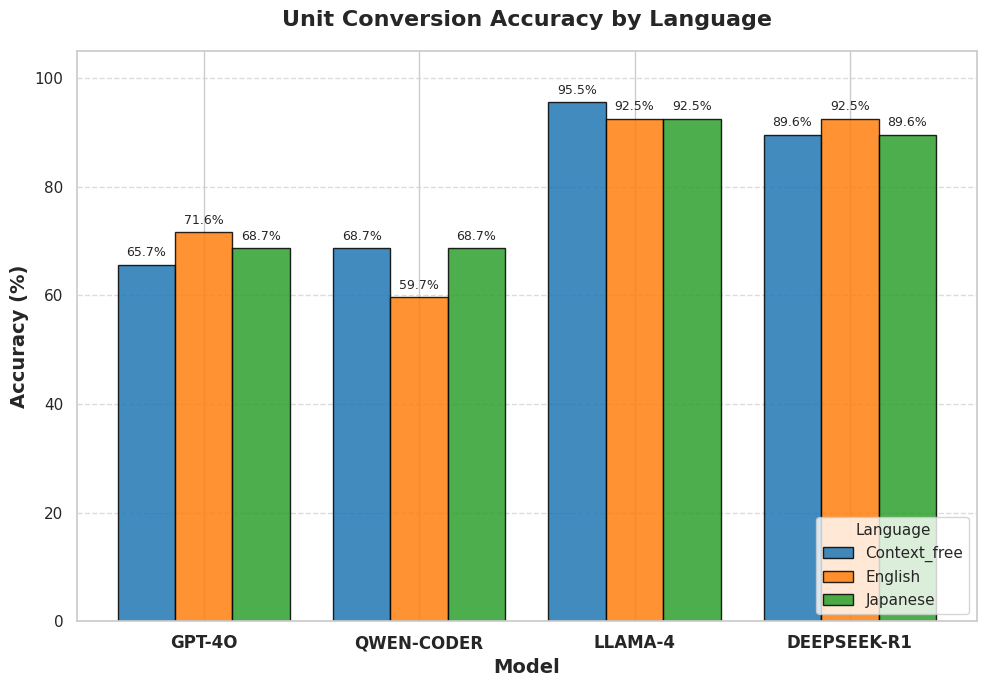

In [17]:
# ...existing code...
def plot_language_comparison(df, output_dir="language_conversion_results/plots"):
    """Create side-by-side comparison of all languages found in the data."""
    # Discover languages and models
    languages = sorted(df['language'].dropna().unique())
    models = df['model'].unique()
    if len(languages) == 0 or len(models) == 0:
        raise ValueError("No languages or models found in dataframe.")
    
    # Colors for languages
    palette = sns.color_palette("tab10", n_colors=max(3, len(languages)))
    lang_colors = {lang: palette[i % len(palette)] for i, lang in enumerate(languages)}
    
    # Prepare data: for each language collect accuracy per model
    fig, ax = plt.subplots(figsize=(max(10, 2*len(models)), 7))
    x = np.arange(len(models))
    n_lang = len(languages)
    width = min(0.8 / n_lang, 0.8)
    offsets = (np.arange(n_lang) - (n_lang - 1) / 2.0) * width
    
    for i, lang in enumerate(languages):
        data = []
        for model in models:
            val = df[(df['model'] == model) & (df['language'] == lang)]['is_correct'].mean()
            data.append(0 if np.isnan(val) else val * 100)
        bars = ax.bar(x + offsets[i], data, width, label=lang.capitalize(), 
                      color=lang_colors[lang], edgecolor='black', alpha=0.85)
        # Add labels
        for bar in bars:
            h = bar.get_height()
            if h > 0:
                ax.text(bar.get_x() + bar.get_width()/2., h + 1, f'{h:.1f}%', ha='center', va='bottom', fontsize=9)
    
    ax.set_xlabel('Model', fontsize=14, fontweight='bold')
    ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
    ax.set_title('Unit Conversion Accuracy by Language', fontsize=16, fontweight='bold', pad=18)
    ax.set_xticks(x)
    ax.set_xticklabels([m.upper() for m in models], fontsize=12, fontweight='bold')
    ax.set_ylim(0, 105)
    ax.legend(title='Language', fontsize=11, title_fontsize=11, loc='lower right')
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    ax.set_axisbelow(True)
    plt.tight_layout()
    return fig
# ...existing code...

# # Cell 3: Language comparison - Main result
# def plot_language_comparison(df, output_dir="language_conversion_results/plots"):
#     """Create side-by-side comparison of English vs Hindi accuracy."""
    
#     # Calculate accuracy by model and language
#     lang_accuracy = df.groupby(['model', 'language'])['is_correct'].agg(['sum', 'count', 'mean']).reset_index()
#     lang_accuracy.columns = ['model', 'language', 'correct', 'total', 'accuracy']
#     lang_accuracy['accuracy'] = lang_accuracy['accuracy'] * 100
    
#     models = df['model'].unique()
    
#     # Create plot
#     fig, ax = plt.subplots(figsize=(12, 7))
    
#     x = np.arange(len(models))
#     width = 0.35
    
#     english_data = []
#     hindi_data = []
    
#     for model in models:
#         model_data = lang_accuracy[lang_accuracy['model'] == model]
#         english_acc = model_data[model_data['language'] == 'english']['accuracy'].values
#         hindi_acc = model_data[model_data['language'] == 'hindi']['accuracy'].values
        
#         english_data.append(english_acc[0] if len(english_acc) > 0 else 0)
#         hindi_data.append(hindi_acc[0] if len(hindi_acc) > 0 else 0)
    
#     bars1 = ax.bar(x - width/2, english_data, width, 
#                    label='English', color='#3498db', 
#                    edgecolor='black', linewidth=1.5, alpha=0.8)
#     bars2 = ax.bar(x + width/2, hindi_data, width,
#                    label='Hindi', color='#e74c3c',
#                    edgecolor='black', linewidth=1.5, alpha=0.8)
    
#     # Customize
#     ax.set_xlabel('Model', fontsize=14, fontweight='bold')
#     ax.set_ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
#     ax.set_title('Unit Conversion Accuracy: English vs Hindi', 
#                  fontsize=16, fontweight='bold', pad=20)
#     ax.set_xticks(x)
#     ax.set_xticklabels([m.upper() for m in models], fontsize=12, fontweight='bold')
#     ax.set_ylim(0, 105)
#     ax.legend(fontsize=13, loc='lower right')
#     ax.yaxis.grid(True, linestyle='--', alpha=0.7)
#     ax.set_axisbelow(True)
    
#     # Add value labels
#     for bars in [bars1, bars2]:
#         for bar in bars:
#             height = bar.get_height()
#             if height > 0:
#                 ax.text(bar.get_x() + bar.get_width()/2., height + 1,
#                        f'{height:.1f}%', ha='center', va='bottom', 
#                        fontsize=10, fontweight='bold')
    
#     # Add difference annotations
#     for i, model in enumerate(models):
#         diff = english_data[i] - hindi_data[i]
#         y_pos = max(english_data[i], hindi_data[i]) + 8
#         color = 'green' if abs(diff) < 1 else 'red'
#         ax.text(i, y_pos, f'Δ {diff:+.1f}%', 
#                ha='center', va='bottom', fontsize=9, 
#                fontweight='bold', color=color)
    
#     plt.tight_layout()
    
#     # Save
#     # os.makedirs(output_dir, exist_ok=True)
#     # output_file = os.path.join(output_dir, 'language_comparison.png')
#     # plt.savefig(output_file, dpi=300, bbox_inches='tight')
#     # print(f"Saved: {output_file}")
    
#     return fig

lang_fig = plot_language_comparison(df)
plt.show()

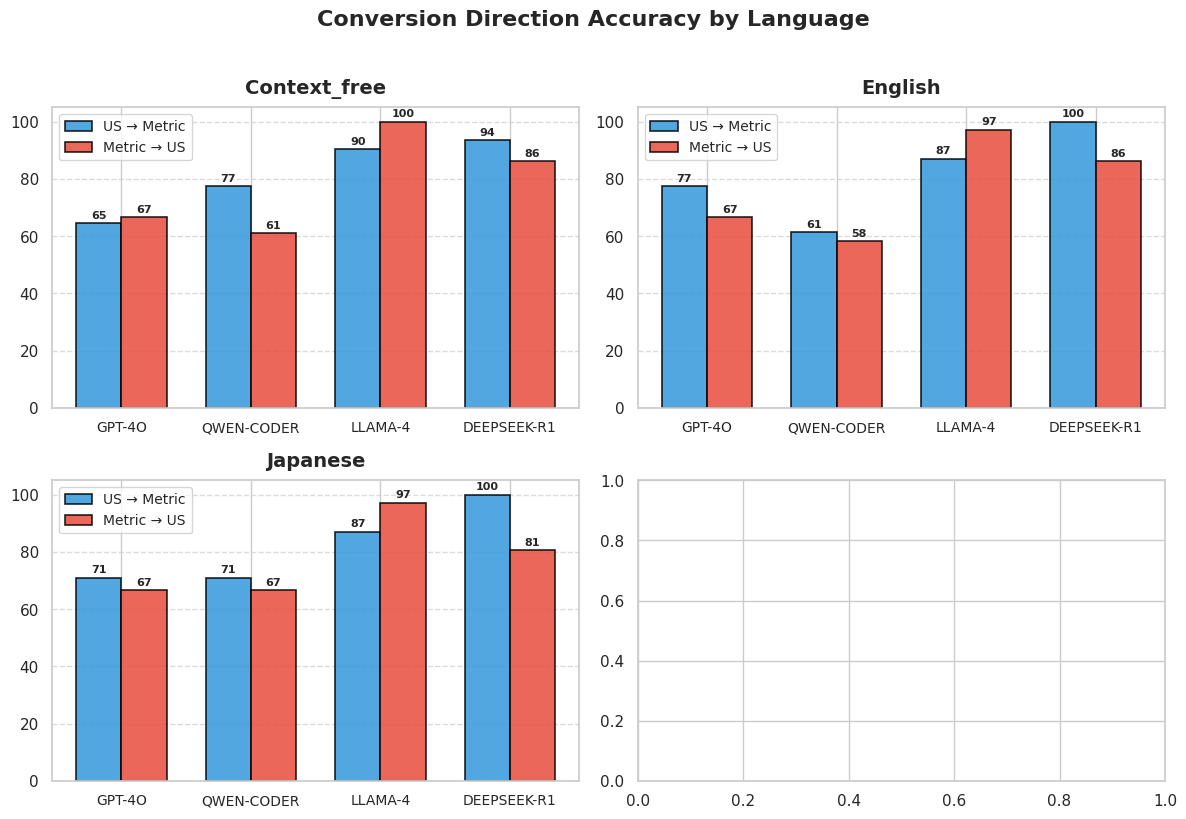

In [18]:
# ...existing code...
def plot_conversion_type_comparison(df, output_dir="language_conversion_results/plots"):
    """Compare conversion direction accuracy for each language found in the data."""
    languages = sorted(df['language'].dropna().unique())
    models = df['model'].unique()
    if len(languages) == 0:
        raise ValueError("No languages found in dataframe.")
    
    type_accuracy = df.groupby(['model', 'language', 'conversion_type'])['is_correct'].mean().reset_index()
    type_accuracy['accuracy'] = type_accuracy['is_correct'] * 100
    
    # Layout grid
    n_lang = len(languages)
    ncols = 2 if n_lang > 1 else 1
    nrows = int(np.ceil(n_lang / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
    axes = np.array(axes).reshape(-1) if n_lang > 1 else [axes]
    
    colors = {'us_to_metric': '#3498db', 'metric_to_us': '#e74c3c'}
    
    for idx, lang in enumerate(languages):
        ax = axes[idx]
        lang_data = type_accuracy[type_accuracy['language'] == lang]
        x = np.arange(len(models))
        width = 0.35
        
        us_to_metric = []
        metric_to_us = []
        for model in models:
            model_data = lang_data[lang_data['model'] == model]
            us_acc = model_data[model_data['conversion_type'] == 'us_to_metric']['accuracy'].values
            metric_acc = model_data[model_data['conversion_type'] == 'metric_to_us']['accuracy'].values
            us_to_metric.append(us_acc[0] if len(us_acc) > 0 else 0)
            metric_to_us.append(metric_acc[0] if len(metric_acc) > 0 else 0)
        
        bars1 = ax.bar(x - width/2, us_to_metric, width, label='US → Metric', color=colors['us_to_metric'],
                      edgecolor='black', linewidth=1.2, alpha=0.85)
        bars2 = ax.bar(x + width/2, metric_to_us, width, label='Metric → US', color=colors['metric_to_us'],
                      edgecolor='black', linewidth=1.2, alpha=0.85)
        
        ax.set_title(f'{lang.capitalize()}', fontsize=14, fontweight='bold', pad=10)
        ax.set_xticks(x)
        ax.set_xticklabels([m.upper() for m in models], fontsize=10)
        ax.set_ylim(0, 105)
        ax.legend(fontsize=10)
        ax.yaxis.grid(True, linestyle='--', alpha=0.7)
        ax.set_axisbelow(True)
        
        # labels
        for bars in [bars1, bars2]:
            for bar in bars:
                h = bar.get_height()
                if h > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., h + 1, f'{h:.0f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    plt.suptitle('Conversion Direction Accuracy by Language', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    return fig
# ...existing code...
# # Cell 4: Accuracy by conversion type and language
# def plot_conversion_type_comparison(df, output_dir="language_conversion_results/plots"):
#     """Compare US→Metric vs Metric→US accuracy."""
    
#     # Calculate accuracy
#     type_accuracy = df.groupby(['model', 'language', 'conversion_type'])['is_correct'].mean().reset_index()
#     type_accuracy.columns = ['model', 'language', 'conversion_type', 'accuracy']
#     type_accuracy['accuracy'] = type_accuracy['accuracy'] * 100
    
#     models = df['model'].unique()
    
#     # Create subplots for each language
#     fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
#     languages = ['english', 'hindi']
#     lang_labels = ['English', 'Hindi']
#     colors = {'us_to_metric': '#3498db', 'metric_to_us': '#e74c3c'}
    
#     for idx, (lang, lang_label) in enumerate(zip(languages, lang_labels)):
#         ax = axes[idx]
#         lang_data = type_accuracy[type_accuracy['language'] == lang]
        
#         x = np.arange(len(models))
#         width = 0.35
        
#         us_to_metric = []
#         metric_to_us = []
        
#         for model in models:
#             model_data = lang_data[lang_data['model'] == model]
#             us_acc = model_data[model_data['conversion_type'] == 'us_to_metric']['accuracy'].values
#             metric_acc = model_data[model_data['conversion_type'] == 'metric_to_us']['accuracy'].values
            
#             us_to_metric.append(us_acc[0] if len(us_acc) > 0 else 0)
#             metric_to_us.append(metric_acc[0] if len(metric_acc) > 0 else 0)
        
#         bars1 = ax.bar(x - width/2, us_to_metric, width, 
#                       label='US → Metric', color=colors['us_to_metric'],
#                       edgecolor='black', linewidth=1.5, alpha=0.8)
#         bars2 = ax.bar(x + width/2, metric_to_us, width,
#                       label='Metric → US', color=colors['metric_to_us'],
#                       edgecolor='black', linewidth=1.5, alpha=0.8)
        
#         # Customize
#         ax.set_xlabel('Model', fontsize=12, fontweight='bold')
#         ax.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
#         ax.set_title(f'{lang_label}', fontsize=14, fontweight='bold', pad=15)
#         ax.set_xticks(x)
#         ax.set_xticklabels([m.upper() for m in models], fontsize=10)
#         ax.set_ylim(0, 105)
#         ax.legend(fontsize=11)
#         ax.yaxis.grid(True, linestyle='--', alpha=0.7)
#         ax.set_axisbelow(True)
        
#         # Add value labels
#         for bars in [bars1, bars2]:
#             for bar in bars:
#                 height = bar.get_height()
#                 if height > 0:
#                     ax.text(bar.get_x() + bar.get_width()/2., height + 1,
#                            f'{height:.0f}', ha='center', va='bottom', 
#                            fontsize=8, fontweight='bold')
    
#     plt.suptitle('Conversion Direction Accuracy by Language', 
#                  fontsize=16, fontweight='bold', y=1.02)
#     plt.tight_layout()
    
#     # Save
#     # output_file = os.path.join(output_dir, 'conversion_type_comparison.png')
#     # plt.savefig(output_file, dpi=300, bbox_inches='tight')
#     # print(f"Saved: {output_file}")
    
#     return fig

type_fig = plot_conversion_type_comparison(df)
plt.show()

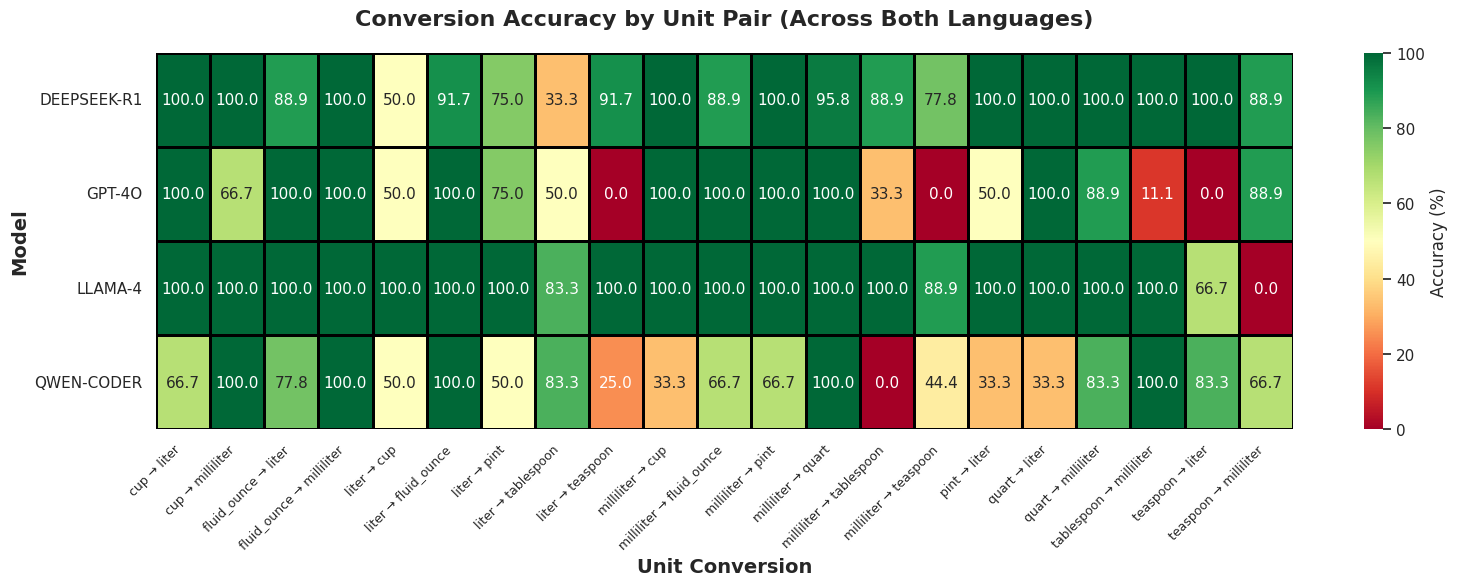

In [19]:

# Cell 5: Heatmap of accuracy by unit pairs
def plot_unit_pair_heatmap(df, output_dir="language_conversion_results/plots"):
    """Create heatmap showing accuracy for different unit conversions."""
    
    # Create from_unit -> to_unit labels
    df['unit_pair'] = df['from_unit'] + ' → ' + df['to_unit']
    
    # Calculate accuracy by model and unit pair
    unit_accuracy = df.groupby(['model', 'unit_pair'])['is_correct'].mean().reset_index()
    unit_accuracy.columns = ['model', 'unit_pair', 'accuracy']
    unit_accuracy['accuracy'] = unit_accuracy['accuracy'] * 100
    
    # Pivot for heatmap
    heatmap_data = unit_accuracy.pivot(index='model', columns='unit_pair', values='accuracy')
    
    # Create plot
    fig, ax = plt.subplots(figsize=(16, 6))
    
    sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='RdYlGn', 
                vmin=0, vmax=100, cbar_kws={'label': 'Accuracy (%)'},
                linewidths=1, linecolor='black', ax=ax)
    
    # Customize
    ax.set_xlabel('Unit Conversion', fontsize=14, fontweight='bold')
    ax.set_ylabel('Model', fontsize=14, fontweight='bold')
    ax.set_title('Conversion Accuracy by Unit Pair (Across Both Languages)', 
                 fontsize=16, fontweight='bold', pad=20)
    ax.set_yticklabels([label.get_text().upper() for label in ax.get_yticklabels()], 
                       rotation=0, fontsize=11)
    ax.set_xticklabels([label.get_text() for label in ax.get_xticklabels()], 
                       rotation=45, ha='right', fontsize=9)
    
    plt.tight_layout()
    
    # Save
    # output_file = os.path.join(output_dir, 'unit_pair_heatmap.png')
    # plt.savefig(output_file, dpi=300, bbox_inches='tight')
    # print(f"Saved: {output_file}")
    
    return fig

unit_fig = plot_unit_pair_heatmap(df)
plt.show()

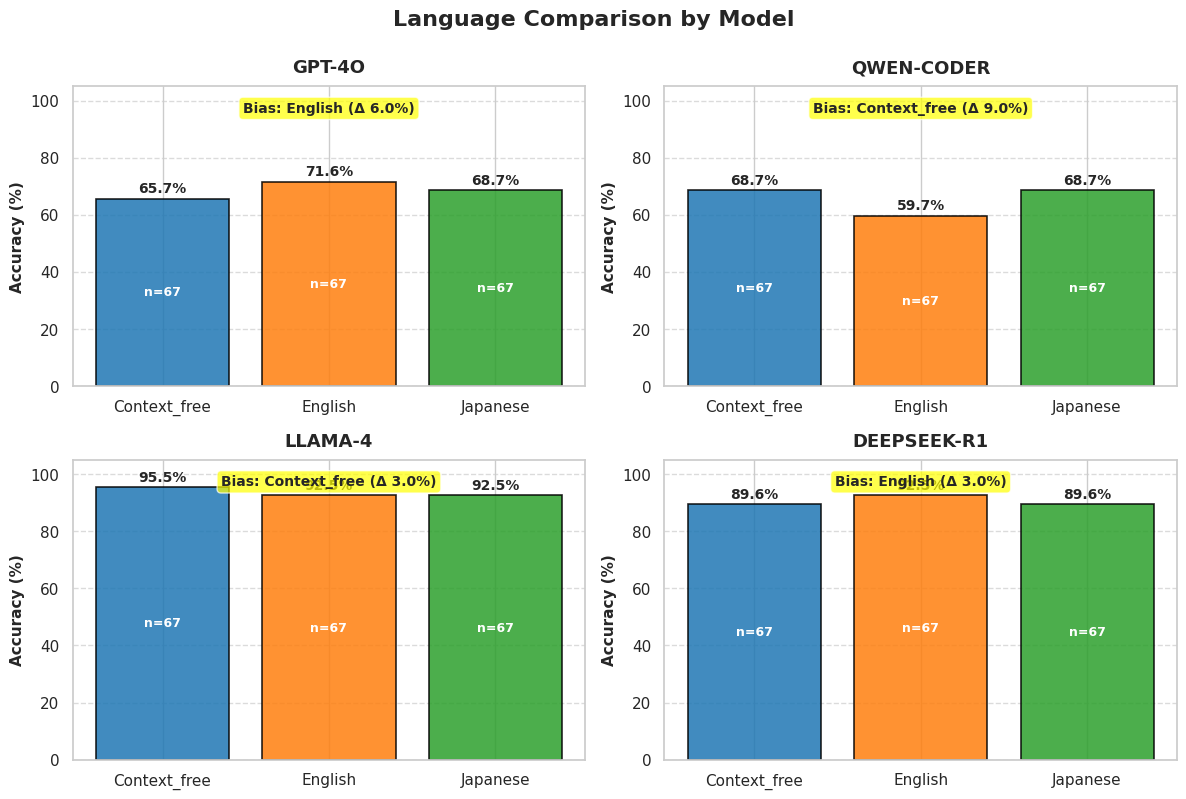

In [20]:
# ...existing code...
def plot_language_bias_detailed(df, output_dir="language_conversion_results/plots"):
    """Visualize language bias per model for all languages."""
    models = df['model'].unique()
    languages = sorted(df['language'].dropna().unique())
    palette = sns.color_palette("tab10", n_colors=max(3, len(languages)))
    lang_colors = {lang: palette[i % len(palette)] for i, lang in enumerate(languages)}
    
    n_models = len(models)
    ncols = min(3, max(1, int(np.ceil(np.sqrt(n_models)))))
    nrows = int(np.ceil(n_models / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows))
    axes = axes.flatten() if n_models > 1 else [axes]
    
    for idx, model in enumerate(models):
        ax = axes[idx]
        model_data = df[df['model'] == model]
        lang_stats = model_data.groupby('language')['is_correct'].agg(['sum', 'count', 'mean']).reset_index()
        lang_stats.columns = ['language', 'correct', 'total', 'accuracy']
        lang_stats['accuracy'] = lang_stats['accuracy'] * 100
        
        bar_colors = [lang_colors[lang] for lang in lang_stats['language']]
        bars = ax.bar(range(len(lang_stats)), lang_stats['accuracy'], color=bar_colors, edgecolor='black', linewidth=1.2, alpha=0.85)
        
        ax.set_title(f'{model.upper()}', fontsize=13, fontweight='bold', pad=10)
        ax.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
        ax.set_xticks(range(len(lang_stats)))
        ax.set_xticklabels([l.capitalize() for l in lang_stats['language']], fontsize=11)
        ax.set_ylim(0, 105)
        ax.yaxis.grid(True, linestyle='--', alpha=0.7)
        ax.set_axisbelow(True)

          # Add value labels
        for i, (bar, row) in enumerate(zip(bars, lang_stats.itertuples())):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 1,
                   f'{height:.1f}%', ha='center', va='bottom', 
                   fontsize=10, fontweight='bold')
            ax.text(bar.get_x() + bar.get_width()/2., height/2,
                   f'n={int(row.total)}', ha='center', va='center', 
                   fontsize=9, color='white', fontweight='bold')
        
        # for i, (bar, row) in enumerate(zip(bars, lang_stats.itertuples())):
        #     h = bar.get_height()
        #     ax.text(bar.get_x() + bar.get_width()/2., h + 1, f'{h:.1f}%', ha='center', va='bottom', fontsize=9)
        #     ax.text(bar.get_x() + bar.get_width()/2., h/2, f'n={int(row.total)}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')
        
        # if len(lang_stats) > 1:
        #     sorted_acc = lang_stats['accuracy'].sort_values(ascending=False).values
        #     diff = sorted_acc[0] - sorted_acc[-1]
        #     bias_label = lang_stats.loc[lang_stats['accuracy'].idxmax(), 'language'].capitalize() if diff > 1 else 'Neutral'
        #     ax.text(0.5, 95, f'Bias: {bias_label} (Δ {diff:.1f}%)', transform=ax.transAxes, ha='center',
        #             fontsize=10, fontweight='bold', bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
            

        # ...existing code...
        if len(lang_stats) > 1:
            sorted_acc = lang_stats['accuracy'].sort_values(ascending=False).values
            diff = sorted_acc[0] - sorted_acc[-1]
            bias_label = lang_stats.loc[lang_stats['accuracy'].idxmax(), 'language'].capitalize() if diff > 1 else 'Neutral'
            ax.text(0.5, 0.95, f'Bias: {bias_label} (Δ {diff:.1f}%)',
                    transform=ax.transAxes, ha='center', va='top',
                    fontsize=10, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7),
                    clip_on=False)
# ...existing code...
    # hide unused axes
    for ax in axes[len(models):]:
        ax.set_visible(False)
    
    plt.suptitle('Language Comparison by Model', fontsize=16, fontweight='bold', y=0.995)
    plt.tight_layout()
    return fig

bias_fig = plot_language_bias_detailed(df)
plt.show()

# ...existing code...
# # Cell 6: Language bias by model (detailed)
# def plot_language_bias_detailed(df, output_dir="language_conversion_results/plots"):
#     """Create detailed language bias visualization."""
    
#     models = df['model'].unique()
    
#     fig, axes = plt.subplots(2, 2, figsize=(14, 10))
#     axes = axes.flatten()
    
#     for idx, model in enumerate(models):
#         ax = axes[idx]
#         model_data = df[df['model'] == model]
        
#         # Calculate accuracy by language
#         lang_stats = model_data.groupby('language')['is_correct'].agg(['sum', 'count', 'mean']).reset_index()
#         lang_stats.columns = ['language', 'correct', 'total', 'accuracy']
#         lang_stats['accuracy'] = lang_stats['accuracy'] * 100
        
#         colors = {'english': '#3498db', 'hindi': '#e74c3c'}
#         bar_colors = [colors[lang] for lang in lang_stats['language']]
        
#         bars = ax.bar(range(len(lang_stats)), lang_stats['accuracy'], 
#                      color=bar_colors, edgecolor='black', linewidth=1.5, alpha=0.8)
        
#         # Customize
#         ax.set_title(f'{model.upper()}', fontsize=13, fontweight='bold', pad=10)
#         ax.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
#         ax.set_xticks(range(len(lang_stats)))
#         ax.set_xticklabels(['English', 'Hindi'], fontsize=11)
#         ax.set_ylim(0, 105)
#         ax.yaxis.grid(True, linestyle='--', alpha=0.7)
#         ax.set_axisbelow(True)
        
#         # Add value labels
        # for i, (bar, row) in enumerate(zip(bars, lang_stats.itertuples())):
        #     height = bar.get_height()
        #     ax.text(bar.get_x() + bar.get_width()/2., height + 1,
        #            f'{height:.1f}%', ha='center', va='bottom', 
        #            fontsize=10, fontweight='bold')
        #     ax.text(bar.get_x() + bar.get_width()/2., height/2,
        #            f'n={int(row.total)}', ha='center', va='center', 
        #            fontsize=9, color='white', fontweight='bold')
        
#         # Add difference
#         if len(lang_stats) == 2:
#             diff = lang_stats.iloc[0]['accuracy'] - lang_stats.iloc[1]['accuracy']
#             ax.text(0.5, 95, f'Δ {diff:+.1f}%', 
#                    transform=ax.transData, ha='center', 
#                    fontsize=10, fontweight='bold',
#                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))
    
#     plt.suptitle('Language Comparison by Model', fontsize=16, fontweight='bold', y=0.995)
#     plt.tight_layout()
    
#     # Save
#     # output_file = os.path.join(output_dir, 'language_bias_detailed.png')
#     # plt.savefig(output_file, dpi=300, bbox_inches='tight')
#     # print(f"Saved: {output_file}")
    
#     return fig



In [21]:
# ...existing code...
# Cell 7: Statistical summary (adapted to arbitrary languages)
print("\n" + "="*80)
print("STATISTICAL SUMMARY")
print("="*80)

# Overall by model and language
print("\nAccuracy by Model and Language:")
lang_stats = df.groupby(['model', 'language'])['is_correct'].agg(['sum', 'count', 'mean']).reset_index()
lang_stats.columns = ['Model', 'Language', 'Correct', 'Total', 'Accuracy']
lang_stats['Accuracy'] = lang_stats['Accuracy'] * 100
lang_stats = lang_stats.sort_values(['Model', 'Language'])
print(lang_stats.to_string(index=False))

# Language bias calculation (per model)
print("\n\nLanguage Bias (per model):")
bias_summary = []
for model in df['model'].unique():
    model_data = df[df['model'] == model]
    per_lang = model_data.groupby('language')['is_correct'].mean() * 100
    if len(per_lang) == 0:
        continue
    best_lang = per_lang.idxmax()
    best_acc = per_lang.max()
    worst_acc = per_lang.min()
    diff = best_acc - worst_acc
    bias_summary.append({
        'Model': model,
        'Best Language': best_lang.capitalize(),
        'Best Accuracy': best_acc,
        'Worst Accuracy': worst_acc,
        'Difference (best - worst)': diff,
        'Bias': best_lang.capitalize() if diff > 1 else 'Neutral'
    })

bias_df = pd.DataFrame(bias_summary)
print(bias_df.to_string(index=False))

# Conversion type accuracy (all languages combined)
print("\n\nAccuracy by Conversion Type:")
type_stats = df.groupby('conversion_type')['is_correct'].agg(['sum', 'count', 'mean']).reset_index()
type_stats.columns = ['Conversion Type', 'Correct', 'Total', 'Accuracy']
type_stats['Accuracy'] = type_stats['Accuracy'] * 100
print(type_stats.to_string(index=False))

print("="*80)
# ...existing code...
# # Cell 7: Statistical summary
# print("\n" + "="*80)
# print("STATISTICAL SUMMARY")
# print("="*80)

# # Overall by model and language
# print("\nAccuracy by Model and Language:")
# lang_stats = df.groupby(['model', 'language'])['is_correct'].agg(['sum', 'count', 'mean']).reset_index()
# lang_stats.columns = ['Model', 'Language', 'Correct', 'Total', 'Accuracy']
# lang_stats['Accuracy'] = lang_stats['Accuracy'] * 100
# lang_stats = lang_stats.sort_values(['Model', 'Language'])
# print(lang_stats.to_string(index=False))

# # Language bias calculation
# print("\n\nLanguage Bias (English - Hindi):")
# bias_summary = []
# for model in df['model'].unique():
#     model_data = df[df['model'] == model]
#     eng_acc = model_data[model_data['language'] == 'english']['is_correct'].mean() * 100
#     hin_acc = model_data[model_data['language'] == 'hindi']['is_correct'].mean() * 100
#     diff = eng_acc - hin_acc
    
#     bias_summary.append({
#         'Model': model,
#         'English Accuracy': eng_acc,
#         'Hindi Accuracy': hin_acc,
#         'Difference': diff,
#         'Bias': 'English' if diff > 1 else 'Hindi' if diff < -1 else 'Neutral'
#     })

# bias_df = pd.DataFrame(bias_summary)
# print(bias_df.to_string(index=False))

# # Conversion type accuracy
# print("\n\nAccuracy by Conversion Type:")
# type_stats = df.groupby('conversion_type')['is_correct'].agg(['sum', 'count', 'mean']).reset_index()
# type_stats.columns = ['Conversion Type', 'Correct', 'Total', 'Accuracy']
# type_stats['Accuracy'] = type_stats['Accuracy'] * 100
# print(type_stats.to_string(index=False))

# print("="*80)



STATISTICAL SUMMARY

Accuracy by Model and Language:
      Model     Language  Correct  Total  Accuracy
deepseek-r1 context_free       60     67 89.552239
deepseek-r1      english       62     67 92.537313
deepseek-r1     japanese       60     67 89.552239
     gpt-4o context_free       44     67 65.671642
     gpt-4o      english       48     67 71.641791
     gpt-4o     japanese       46     67 68.656716
    llama-4 context_free       64     67 95.522388
    llama-4      english       62     67 92.537313
    llama-4     japanese       62     67 92.537313
 qwen-coder context_free       46     67 68.656716
 qwen-coder      english       40     67 59.701493
 qwen-coder     japanese       46     67 68.656716


Language Bias (per model):
      Model Best Language  Best Accuracy  Worst Accuracy  Difference (best - worst)         Bias
     gpt-4o       English      71.641791       65.671642                   5.970149      English
 qwen-coder  Context_free      68.656716       59.701493    